In [32]:
import pandas as pd

# Data Understanding

In [33]:
# Load datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.head())  # Explore the data
print(df_train.info())  # Check for missing values and data types
print(df_train.describe())  # Summary statistics

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Data Preparation

In [34]:
# Drop rows with missing target values
df_train.dropna(subset=['Survived'], inplace=True)

# Encode categorical variables and select features for training
X_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' as binary
y_train = df_train['Survived']  # Target variable

# Handle missing values in 'Age' by filling with the median
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)

/var/folders/q6/72wkkn413dgdddwstmd4lfcm0000gn/T/ipykernel_3057/1663502984.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' as binary
/var/folders/q6/72wkkn413dgdddwstmd4lfcm0000gn/T/ipykernel_3057/1663502984.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to per

In [35]:
# Prepare the test dataset
# Encode categorical variables in the test set
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' as binary

# Handle missing values in 'Age' and other features
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)  # Handle missing values in 'Age'
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)  # Handle missing values in 'Fare' if necessary
X_test.fillna(0, inplace=True)  # Fill any remaining NaNs with 0 or use another strategy


/var/folders/q6/72wkkn413dgdddwstmd4lfcm0000gn/T/ipykernel_3057/3380909269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' as binary
/var/folders/q6/72wkkn413dgdddwstmd4lfcm0000gn/T/ipykernel_3057/3380909269.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perfor

# Modeling

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Print training accuracy
print(f'Training Accuracy: {accuracy_train:.2f}')

Training Accuracy: 0.80


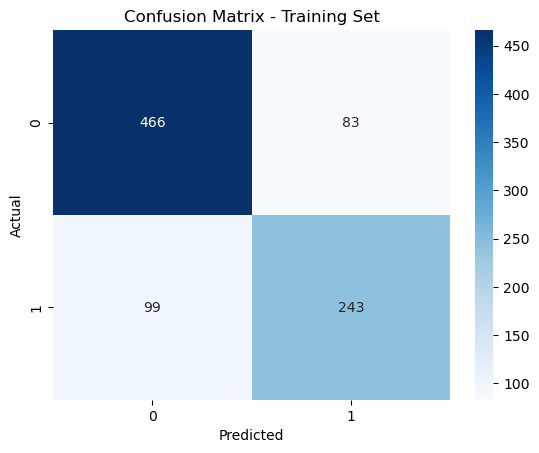

In [38]:
# Plot confusion matrix for training set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()


In [39]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [40]:
# Optionally, save predictions to a CSV file
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test_pred})
submission.to_csv('./Analysis-Result/submission.csv', index=False)